## Project Overview
Team members: Emily, Natasha, Mila

In this environment we have attempted to recreate a forest with animals that hunt for food. We added two robots that replicate the behaviours of a sheep and a wolf. Both animals hunt for food if their hunger levels go down and ignore it when their hunger levels are low. The wolf robot in addition to hunting spheres to eat it also hunts the sheep robot. The higher the level of hunger of the wolf the more weight it gives to hunt the sheep rather than the spheres. 

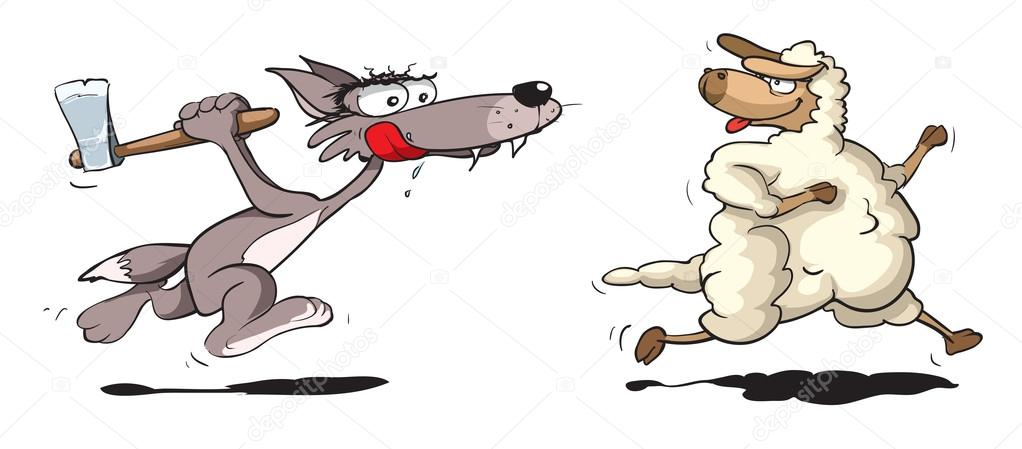

### Initiate session

In [1]:
#Open Session
from simulator_interface import open_session, close_session
#assigning variable names for the session
simulator, wolf, sheep = open_session(n_epucks=2)

In [0]:
close_session(simulator) # Just in case something goes wrong

### Defining the species of the robots

In [2]:
#we specify the species of each robot so we can create different behaviours
wolf.species = "wolf"
sheep.species = "sheep"

### Defining basic behaviors (fear, aggression, obstacle avoidance)

In [3]:
#Defining fear behavior
#if a wolf ePuck comes near, accelerate speed to get away from it
def fear(robot):
    (left, right), (epuck_left, epuck_right) = robot.prox_activations(tracked_objects=["ePuck"], return_epucks=True)
    left_species, right_species = robot.sensed_epuck_attributes(epuck_left, epuck_right, "species", default_value ="none")
    left_activation = left + 2 if left_species == "wolf" else 0
    right_activation = right + 2 if right_species == "wolf" else 0
    return left_activation, right_activation


#Defining aggressive behavior
#if other ePuck comes near, accelerate speed towards it and if the hunger level is higher give more weight into this def
def aggression(robot):
    left, right = robot.prox_activations(tracked_objects=["ePuck"])
    left_wheel = right + 1 
    right_wheel = left + 1
    return left_wheel, right_wheel, 1 - robot.glucose_level

    
#Defining obstacle avoidance behavior
#if the proximity sensors register a wall or a tree, ePuck turns away
def obstacle_avoidance(robot):
    left, right = robot.prox_activations(tracked_objects=["20cmHighWall", "Tree"])  
    sum_of_proxs = left + right
    wheel_activation_1 = 1.0 - sum_of_proxs / 2.0
    wheel_activation_2 = 1.0 - sum_of_proxs / 1.5  
    return wheel_activation_1, wheel_activation_2, 1

### Feeding our robots

In [4]:
wolf.has_eaten() #Tells us if the wolf robot has eaten a sphere since the last call of the function

False

In [5]:
# Starting sphere apparition in the environment:
simulator.start_sphere_apparition(period=20)

Routine sphere_apparition started
Routine eating started


### Applying routines 

In [6]:
#A function to compute the glucose level of the robot
def foraging_drive(robot): 
    if robot.has_eaten():
        robot.glucose_level += 0.2  # if the robot has eaten a sphere, increase its glucose level by 0.2
    else:
        robot.glucose_level -= 0.03  # otherwise (nothing eaten), decrease the glucose level by 0.03
    robot.glucose_level = min(1., max(robot.glucose_level, 0.))


### Defining food hunting behaviours

In [7]:
#Defining behaviors for the robot to search for food when hungry/ glucose level low (foraging) 
def foraging(robot):
    left, right = robot.prox_activations(tracked_objects=["Sphere"])
    left_activation = right
    right_activation = left
    return left_activation, right_activation, 1 - robot.glucose_level

#Defining behavior to neglect food when full/ glucose level high (neglecting)    
def neglecting(robot):
    left, right = robot.prox_activations(tracked_objects=["Sphere"])
    left_activation = left
    right_activation = right
    return left_activation, right_activation, robot.glucose_level

In [8]:
#Defining initial glucose level for wolf and sheep robot (wolf is more hungry at the beginning)
wolf.glucose_level = 0.5
sheep.glucose_level = 0.8

### Attach and start all behaviors and routines

In [9]:
wolf.detach_all_behaviors()
sheep.detach_all_behaviors()

# We attach the desired behaviors to epuck1/ the sheep:
sheep.attach_behavior(fear, freq=10)

# We attachthe corresponding behaviors to epuck2/ the wolf:
wolf.attach_behavior(aggression, freq=10)

# Then we attach the rest of the behaviours to all the robots in the scene
for e in simulator.robots:
    e.attach_behavior(obstacle_avoidance, freq=10)
    e.attach_behavior(foraging, freq=10)
    e.attach_behavior(neglecting, freq=10)
    e.attach_routine(foraging_drive, freq=1)
    e.start_all_behaviors()
    e.start_routine(foraging_drive)
    
sheep.start_all_behaviors()# This will start all attached behaviors (fear, obstacle_avoidance etc.) for sheep
wolf.start_all_behaviors()  # This will start all attached behaviors (aggression, obstacle_avoidance etc.) for wolf

sheep.start_routine(foraging_drive)# This will start the foraging_drive routine for sheep
wolf.start_routine(foraging_drive) # This will start the foraging_drive routine for wolf

Behavior aggression started
Behavior obstacle_avoidance started
Behavior foraging started
Behavior neglecting started
Routine foraging_drive started
Behavior fear started
Behavior obstacle_avoidance started
Behavior foraging started
Behavior neglecting started
Routine foraging_drive started
Behavior fear started
Behavior obstacle_avoidance started
Behavior foraging started
Behavior neglecting started
Behavior aggression started
Behavior obstacle_avoidance started
Behavior foraging started
Behavior neglecting started
Routine foraging_drive started
Routine foraging_drive started


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Limitations and perspectives of the project

One of the limitations that we encountered was that we wanted to have a behavior where when the wolf is not hungry it seeks out the sheep as a friend, and when it is hungry it wants to eat the sheep. We wanted to use the glucose level and social need parameter for this within the foraging function. However for some reason it did not recognize the social need level, so we ended up not doing that idea.  

### What problems did you encounter

We tried to apply the aggression behaviour to the specific species. For example if the wolf species encounters a sheep robot then it will engage and become aggresive towards it. But when applying the code the wolf robot seemed to be avoiding and running away from the sheep robot. At the moment we only applied the aggresion behaviour to the wolf robot which kind of fixes our problem. But in case we want to add more robots in the environment we need to further investigate the problem. 



### What you would have liked to do and the reasons why you didn’t do it

We had a few ideas but when trying them out we realised it wouldn't be possible to do them for this project. Some of our ideas and their limitations were: 

1) Create a maze in which the robots would look for each other. The limitation with this idea was that the robots were stuck in places and were rotating around the area instead of moving around. Also they did not regonize/see each other through the walls

2) We tried to use other robots to make the environment a bit more interesting but we found that required different libraries than what we had. 


### How could you extend your project to study concepts of computational cognitive science you have seen in other CSIM courses?

We could use the project to build and experiment that looks at how having a goal oriented task affects exploration versus not having a goal oriented task. We could do this by having one "wolf" that explores an enivonment where there is a "sheep" it is set to pursue, and one wolf that has no sheep to pursue, just food to collect. 